In [1]:
%env XLA_FLAGS=--xla_gpu_deterministic_ops=true
%env CUDA_VISIBLE_DEVICES=2
from earth2studio.models.px import GraphCastMini
from graphcast import data_utils
import xarray as xr
import dataclasses
from graphcast import rollout
from graphcast import data_utils
import jax
import numpy as np
from earth2studio.data.utils import fetch_data
from earth2studio.utils.coords import map_coords

from earth2studio.data import WB2ERA5
from datetime import datetime


env: XLA_FLAGS=--xla_gpu_deterministic_ops=true
env: CUDA_VISIBLE_DEVICES=2


/home/fe/matosalmeida/earth2studio/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pkg = GraphCastMini.load_default_package()
model = GraphCastMini.load_model(pkg)

In [3]:
ds = WB2ERA5(cache=True)

In [ ]:
x0, coords0 = fetch_data(
    source=ds,
    time=[datetime(2022,1,1)],
    variable=model.input_coords()["variable"],
    lead_time=model.input_coords()["lead_time"],
    device="cuda",
)


Fetching WB2 data:   0%|          | 0/85 [00:00<?, ?it/s]

2025-05-19 16:17:19.646 | DEBUG    | earth2studio.data.wb2:fetch_array:222 - Fetching WB2 zarr array for variable: w700 at 2021-12-31T18:00:00
2025-05-19 16:17:19.651 | DEBUG    | earth2studio.data.wb2:fetch_array:222 - Fetching WB2 zarr array for variable: u100 at 2021-12-31T18:00:00
2025-05-19 16:17:19.655 | DEBUG    | earth2studio.data.wb2:fetch_array:222 - Fetching WB2 zarr array for variable: w600 at 2021-12-31T18:00:00
2025-05-19 16:17:19.660 | DEBUG    | earth2studio.data.wb2:fetch_array:222 - Fetching WB2 zarr array for variable: u50 at 2021-12-31T18:00:00
2025-05-19 16:17:19.664 | DEBUG    | earth2studio.data.wb2:fetch_array:222 - Fetching WB2 zarr array for variable: w500 at 2021-12-31T18:00:00
2025-05-19 16:17:19.668 | DEBUG    | earth2studio.data.wb2:fetch_array:222 - Fetching WB2 zarr array for variable: z1000 at 2021-12-31T18:00:00
2025-05-19 16:17:19.672 | DEBUG    | earth2studio.data.wb2:fetch_array:222 - Fetching WB2 zarr array for variable: w1000 at 2021-12-31T18:00:0

Fetching WB2 data:   0%|          | 0/85 [00:00<?, ?it/s]

2025-05-19 16:17:19.848 | DEBUG    | earth2studio.data.wb2:fetch_array:222 - Fetching WB2 zarr array for variable: v300 at 2021-12-31T18:00:00
2025-05-19 16:17:19.853 | DEBUG    | earth2studio.data.wb2:fetch_array:222 - Fetching WB2 zarr array for variable: t300 at 2021-12-31T18:00:00
2025-05-19 16:17:19.857 | DEBUG    | earth2studio.data.wb2:fetch_array:222 - Fetching WB2 zarr array for variable: v250 at 2021-12-31T18:00:00
2025-05-19 16:17:19.862 | DEBUG    | earth2studio.data.wb2:fetch_array:222 - Fetching WB2 zarr array for variable: t250 at 2021-12-31T18:00:00
2025-05-19 16:17:19.866 | DEBUG    | earth2studio.data.wb2:fetch_array:222 - Fetching WB2 zarr array for variable: q850 at 2021-12-31T18:00:00
2025-05-19 16:17:19.870 | DEBUG    | earth2studio.data.wb2:fetch_array:222 - Fetching WB2 zarr array for variable: t200 at 2021-12-31T18:00:00
2025-05-19 16:17:19.875 | DEBUG    | earth2studio.data.wb2:fetch_array:222 - Fetching WB2 zarr array for variable: q700 at 2021-12-31T18:00:00

Fetching WB2 data:   0%|          | 0/85 [00:00<?, ?it/s]

2025-05-19 16:17:22.784 | DEBUG    | earth2studio.data.wb2:fetch_array:222 - Fetching WB2 zarr array for variable: w700 at 2022-01-01T00:00:00
2025-05-19 16:17:22.786 | DEBUG    | earth2studio.data.wb2:fetch_array:222 - Fetching WB2 zarr array for variable: u100 at 2022-01-01T00:00:00
2025-05-19 16:17:22.789 | DEBUG    | earth2studio.data.wb2:fetch_array:222 - Fetching WB2 zarr array for variable: w600 at 2022-01-01T00:00:00
2025-05-19 16:17:22.792 | DEBUG    | earth2studio.data.wb2:fetch_array:222 - Fetching WB2 zarr array for variable: u50 at 2022-01-01T00:00:00
2025-05-19 16:17:22.794 | DEBUG    | earth2studio.data.wb2:fetch_array:222 - Fetching WB2 zarr array for variable: w500 at 2022-01-01T00:00:00
2025-05-19 16:17:22.796 | DEBUG    | earth2studio.data.wb2:fetch_array:222 - Fetching WB2 zarr array for variable: z1000 at 2022-01-01T00:00:00
2025-05-19 16:17:22.799 | DEBUG    | earth2studio.data.wb2:fetch_array:222 - Fetching WB2 zarr array for variable: w1000 at 2022-01-01T00:00:0

Fetching WB2 data:   0%|          | 0/85 [00:00<?, ?it/s]

2025-05-19 16:17:22.985 | DEBUG    | earth2studio.data.wb2:fetch_array:222 - Fetching WB2 zarr array for variable: v10m at 2022-01-01T00:00:00
2025-05-19 16:17:22.988 | DEBUG    | earth2studio.data.wb2:fetch_array:222 - Fetching WB2 zarr array for variable: u200 at 2022-01-01T00:00:00
2025-05-19 16:17:22.990 | DEBUG    | earth2studio.data.wb2:fetch_array:222 - Fetching WB2 zarr array for variable: u150 at 2022-01-01T00:00:00


Fetching WB2 data: 100%|██████████| 85/85 [00:02<00:00, 38.30it/s]


In [5]:
xm, coordsm = map_coords(x0, coords0, model.input_coords())

In [6]:
iter = model.create_iterator(xm, coordsm)
iter_res = [next(iter) for _ in range(2)]
prediction_e2studio = []
for pred_x, pred_coords in iter_res:
    if pred_coords["lead_time"].size == 2:
        pred_coords["lead_time"] = pred_coords["lead_time"][1]
    prediction_e2studio.append(xr.DataArray(pred_x.cpu(), coords=pred_coords))

In [7]:
batch, target_lead_times = model.from_dataarray_to_dataset(
                xr.DataArray(xm.cpu(), coords=coordsm), 6
            )

In [8]:

eval_inputs, eval_targets, eval_forcings = data_utils.extract_inputs_targets_forcings(
    batch, target_lead_times=target_lead_times,
    **dataclasses.asdict(model.ckpt.task_config))
generator = rollout.chunked_prediction_generator(model.run_forward,
rng=jax.random.PRNGKey(0),
inputs=eval_inputs,
targets_template=eval_targets * np.nan,
forcings=eval_forcings)
prediction_graphcast = [next(generator) for _ in range(1)]
prediction_graphcast

[<xarray.Dataset> Size: 22MB
 Dimensions:                  (time: 1, batch: 1, lat: 181, lon: 360, level: 13)
 Coordinates:
   * lat                      (lat) float64 1kB -90.0 -89.0 -88.0 ... 89.0 90.0
   * lon                      (lon) float64 3kB 0.0 1.0 2.0 ... 357.0 358.0 359.0
   * level                    (level) int64 104B 50 100 150 200 ... 850 925 1000
   * time                     (time) timedelta64[ns] 8B 06:00:00
 Dimensions without coordinates: batch
 Data variables:
     10m_u_component_of_wind  (time, batch, lat, lon) float32 261kB xarray_jax...
     10m_v_component_of_wind  (time, batch, lat, lon) float32 261kB xarray_jax...
     2m_temperature           (time, batch, lat, lon) float32 261kB xarray_jax...
     geopotential             (time, batch, level, lat, lon) float32 3MB xarra...
     mean_sea_level_pressure  (time, batch, lat, lon) float32 261kB xarray_jax...
     specific_humidity        (time, batch, level, lat, lon) float32 3MB xarra...
     temperature    

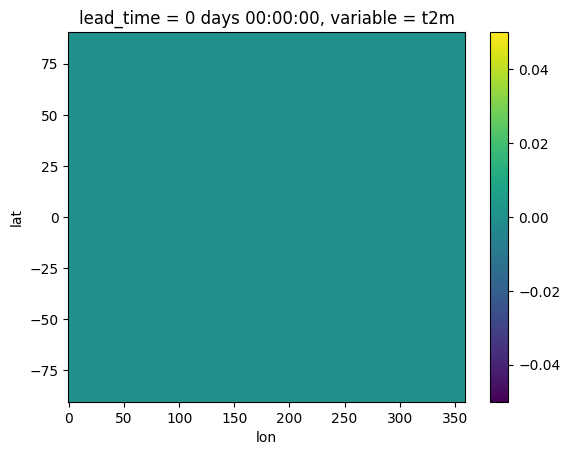

In [9]:
# Is IC the same?
(prediction_e2studio[0].isel(variable=0, time=0, lead_time=0) - eval_inputs["2m_temperature"].isel(time=1, batch=0)).plot()

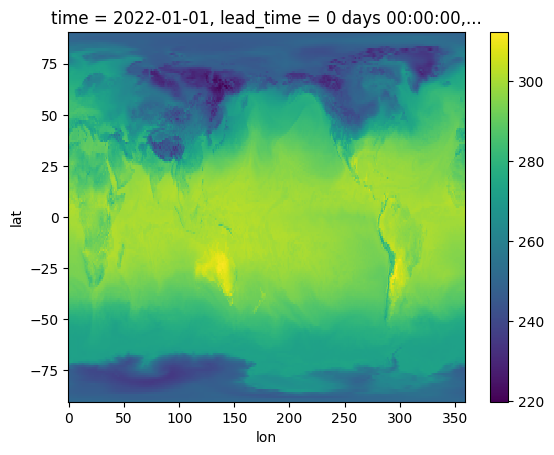

In [12]:
prediction_e2studio[0].isel(variable=0, time=0, lead_time=0).plot()

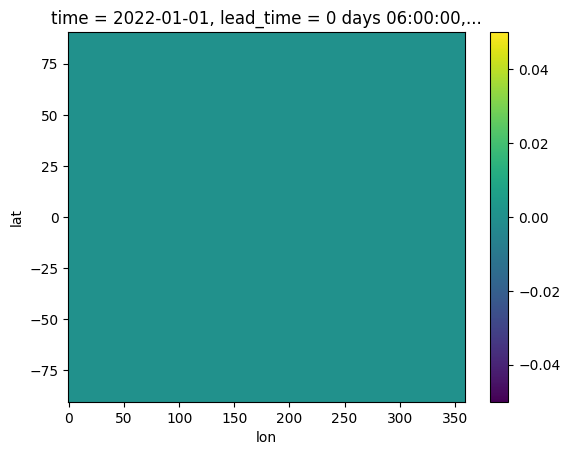

In [10]:
# Is prediction the same?
(prediction_e2studio[1].sel(variable="t2m") - prediction_graphcast[0]["2m_temperature"].isel(time=0)).plot()

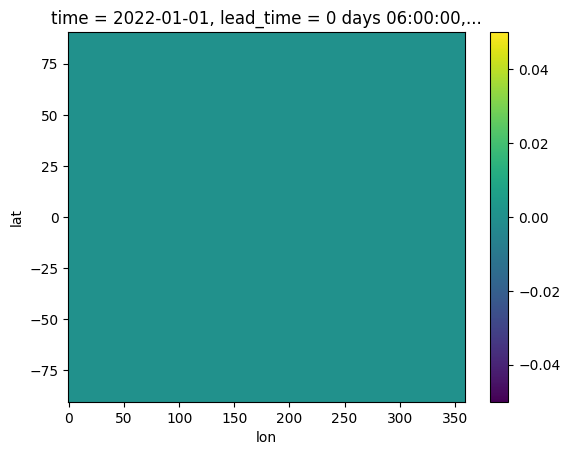

In [11]:
(prediction_e2studio[1].sel(variable="tp06") - prediction_graphcast[0]["total_precipitation_6hr"].isel(time=0)).plot()

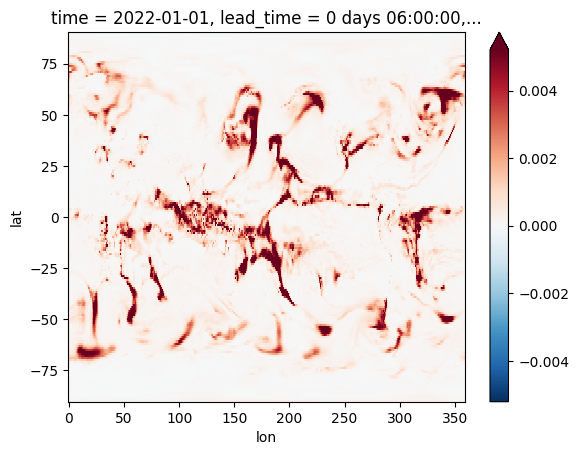

In [14]:
prediction_e2studio[1].sel(variable="tp06").plot(robust=True)